**Step 1: Gathering and Cleaning Data**

In [1]:
!pip install pandas plotnine
from plotnine import *
import pandas as pd
import numpy as np
from sklearn import linear_model # necessary package for linear regression
import seaborn as sns
import matplotlib.pyplot as plt #for visualization
from sklearn.model_selection import train_test_split #for ml training and tesing split
from sklearn.linear_model import LinearRegression
from sklearn import tree # package for decision tree


with open('data.csv') as file:
    df = pd.read_csv(file)
print(df.dtypes)
print(df)

Month            int64
Year             int64
Rainfall       float64
Temperature    float64
Humidity         int64
Yield          float64
cost           float64
crop            object
dtype: object
     Month  Year  Rainfall  Temperature  Humidity   Yield   cost       crop
0        1  2013      11.3      19.7000        77     0.0  121.6      Wheat
1        2  2013      40.1      22.1500        77     0.0  123.6      Wheat
2        3  2013      15.7      25.5900        63  3117.0  122.8      Wheat
3        4  2013      30.4      28.1700        43  3117.0  120.1      Wheat
4        5  2013      57.8      30.3600        38  3117.0  118.9      Wheat
..     ...   ...       ...          ...       ...     ...    ...        ...
355      8  2022     264.0      31.5344        77     NaN  175.3  Groundnut
356      9  2022     181.4      31.9751        78     0.0  175.2  Groundnut
357     10  2022     111.8      32.0322        77     0.0  175.2  Groundnut
358     11  2022      18.6      29.1711   

In initial steps, I started with data preproccessing to check if there are null values in the dataset. Furthermore, some feature names (column names) were renamed for better readability and understanding.

Next step involves exploratory data analysis.
Firstly, I explored the relationships between all the features (column names) of the dataset, a good way to quickly check correlations among columns by visualizing the correlation matrix as a heatmap.

**Step 2: Exploratory Data Analysis**

Text(0.5, 1.0, 'Correlation Heatmap')

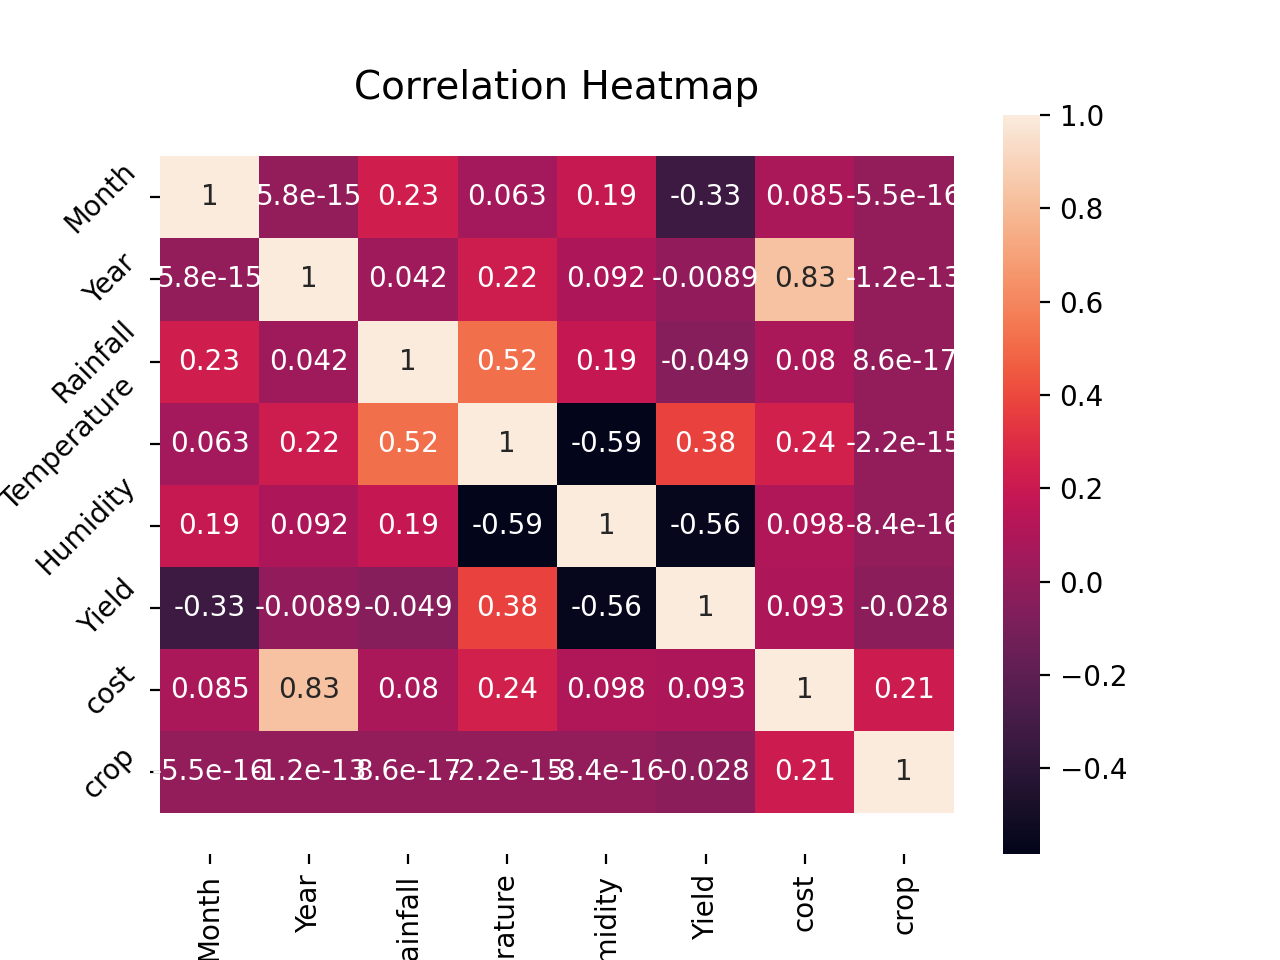

In [72]:
#checking the correlation matrix, to know that how columns are corelated
df_corr = df.corr() #caculation of correlation
ax = sns.heatmap(df_corr, annot=True) #plot in a heatmap
bottom, top = ax.get_ylim() #limit set up
ax.set_ylim(bottom + 0.5, top - 0.5) #setting up limit for better visualization
ax.set_yticklabels(ax.get_yticklabels(),rotation=45,horizontalalignment='right')#changing y columns labels direction
ax.set_title('Correlation Heatmap',fontsize = 14)#adding title for the plot

It can be observed from the correlation matrix that there is no significant correlation among the features (column names).
Next, I visualized crop-wise total Yield. Using this, we can visualize magnitude of Yield among different crops.

In [3]:
df.columns

Index(['Month', 'Year', 'Rainfall', 'Temperature', 'Humidity', 'Yield', 'cost',
       'crop'],
      dtype='object')

        crop     Yield
1      Paddy  197958.0
0  Groundnut  104265.0
2      Wheat   97845.0


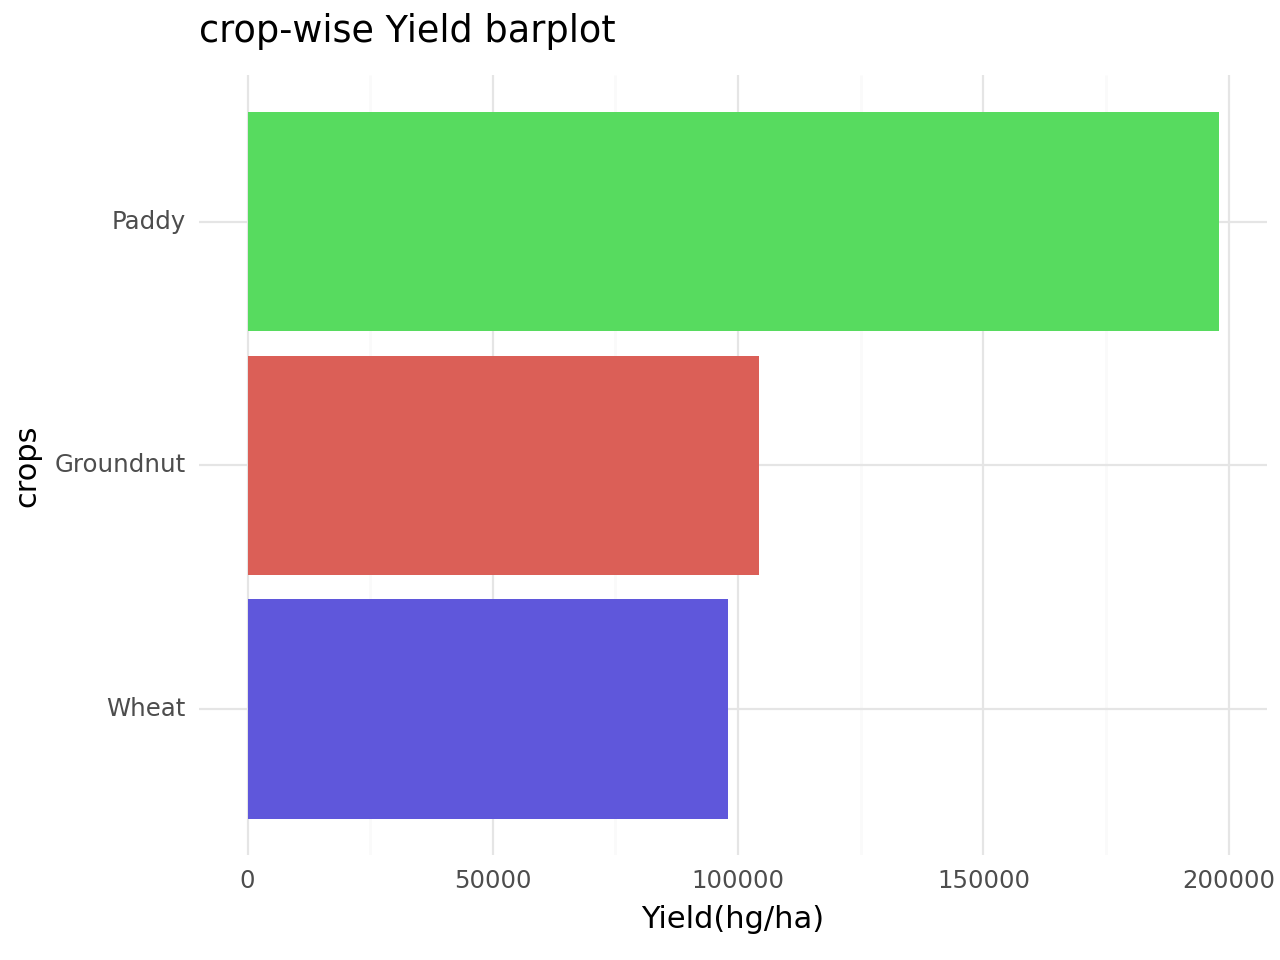

<Figure Size: (640 x 480)>

In [4]:
#Representation of crop as per Yield
df1=df.groupby(['crop'])['Yield'].aggregate('sum').reset_index(name='Yield') #creation of dataframe based on cropwise Yield
df_1=df1.sort_values(by=['Yield'], ascending=False) #Sorting of values as per order of Yield
print(df_1) #printing

p=ggplot(df_1, aes(x='crop',y='Yield',fill='crop'))+ geom_bar(stat="identity")+theme_minimal()+coord_flip()+ scale_x_discrete(limits=df_1['crop'].tolist()[::-1]) #plotting Yield and crop using ggplot
p=p+guides(fill = False, color = False, linetype = False, shape = False)#removing redundant legends
p+labs(title = "crop-wise Yield barplot",x = "crops", y = "Yield(hg/ha)") #adding up title and labels to thr x and y axis

The next plot helped us to visualize increase in usage of Rainfalls over the years. This would help us check later if this feature has any impact on Yield or not.

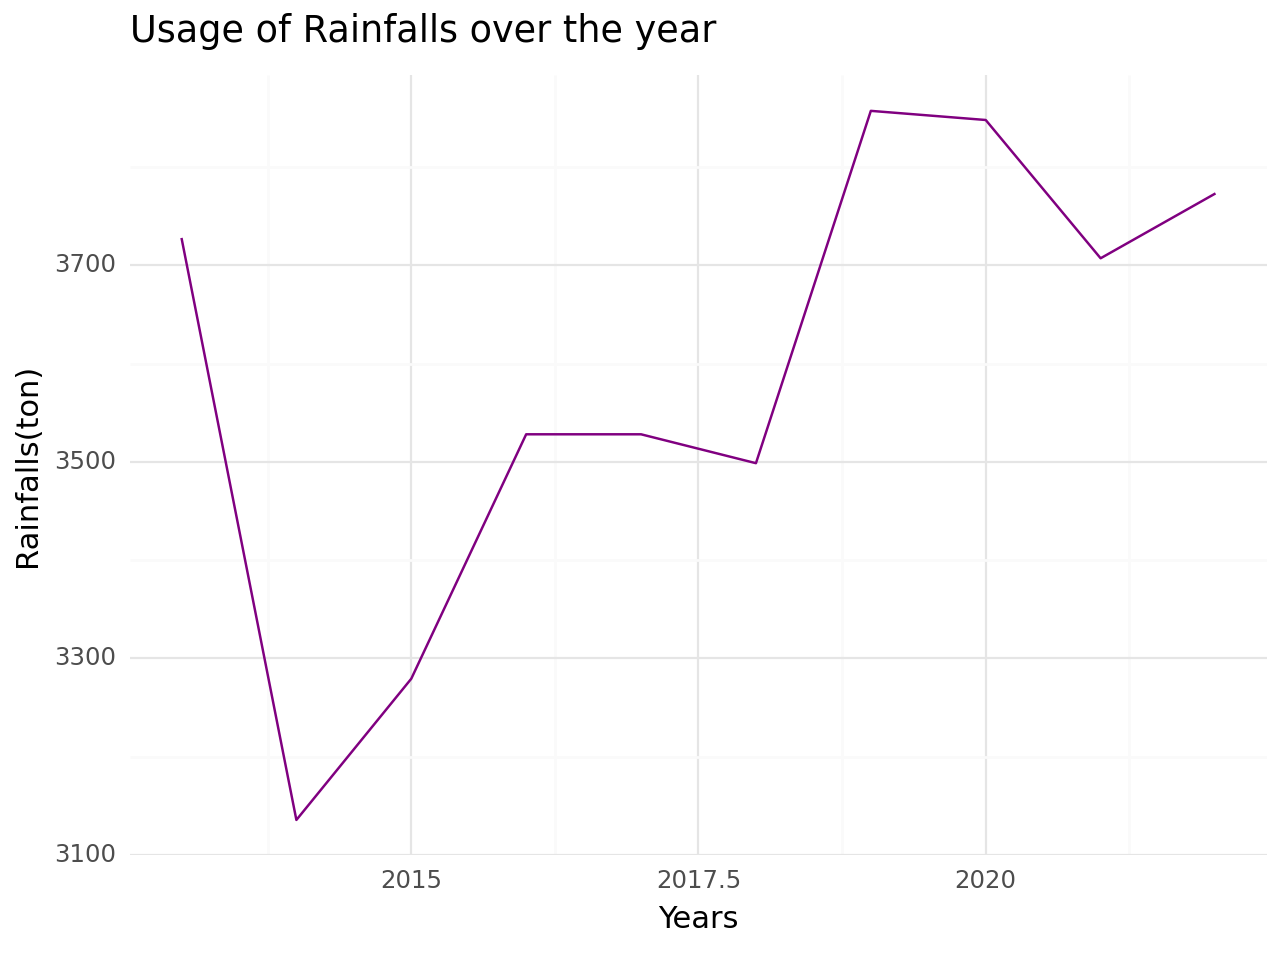

<Figure Size: (640 x 480)>

In [5]:
#visualization of how use of Rainfalls increased in years
df_py=df.groupby(['Year'])['Rainfall'].aggregate('sum').reset_index(name='Rainfall') #creating dataframe yearwise total Rainfall used
#df_1=df1.sort_values(by=[''], ascending=False)
#print(df_1)
ggplot(df_py, aes('Year','Rainfall'))+ geom_line(colour='purple')+theme_minimal()+labs(title = "Usage of Rainfalls over the year",x = "Years", y = "Rainfalls(ton)")
#ploting pasticide vs year using ggplot, changing of colour,theme, title, labels for better visualization

From the above plot it could be inferred that usage of Rainfalls has increased drastically over time. I wondered if there is any impact on crop Yield due to this increased Rainfall usage with time.
Therefore, I visualized changes in crop-wise Yield over time using a line-plot.

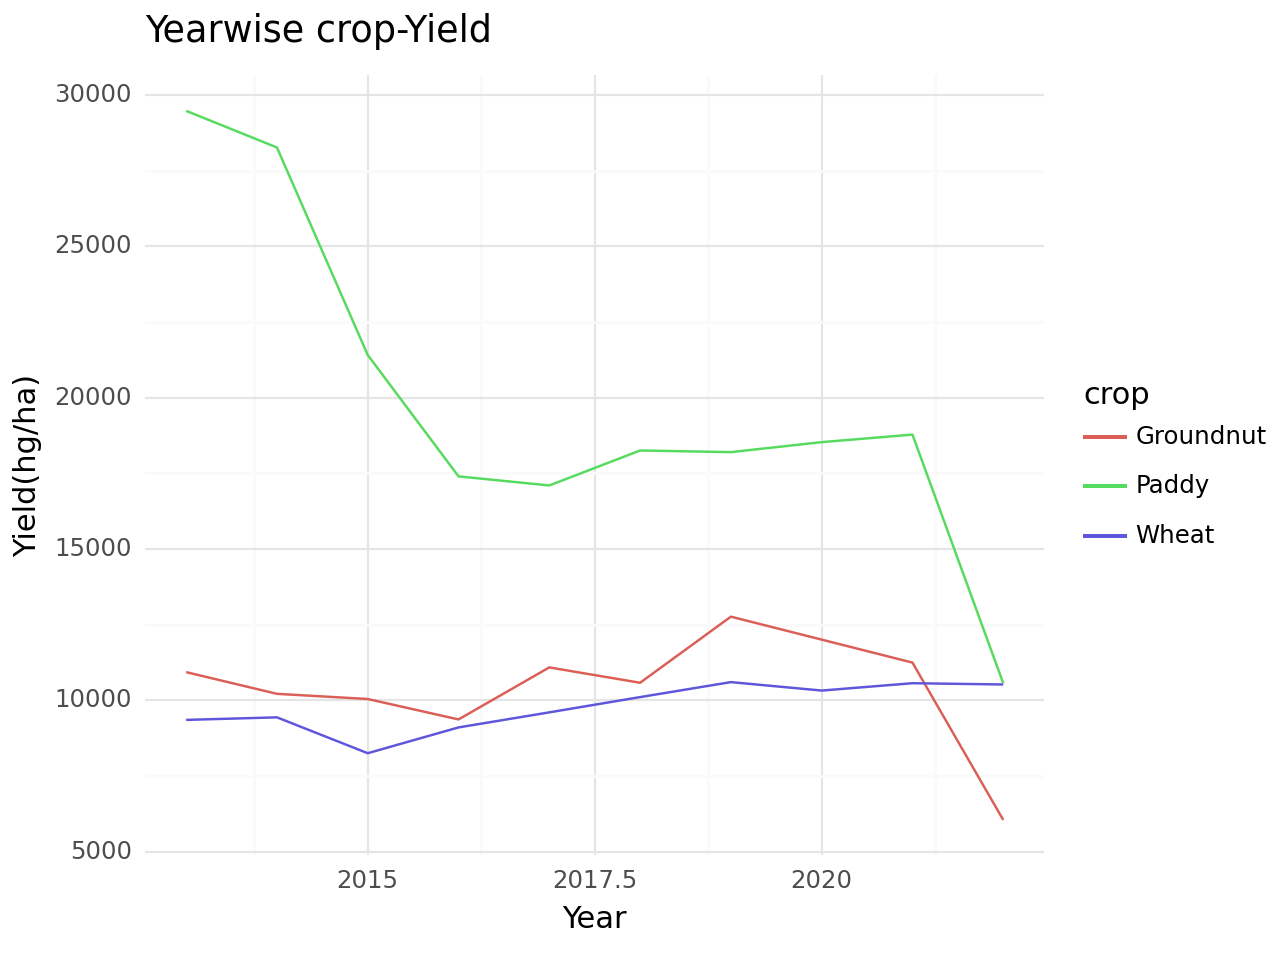

<Figure Size: (640 x 480)>

In [6]:
#how crop production changed in years
df2 = df.groupby(['crop','Year'])['Yield'].aggregate('sum').reset_index(name='Yield') #creating dataframe for crops,Yield according to year
ggplot(df2,aes(x='Year', y='Yield', colour='crop')) + geom_line()+theme_minimal()+ labs(title = "Yearwise crop-Yield",x = "Year", y = "Yield(hg/ha)")
#ploting of the data using ggplot where in x axis year and in y axis Yield are considered and color has been chosen crop-wise

It can be seen from the above plot that Yield of potato has increased drastically followed by sweet potato and yam at the second and the third spot.

To further explore statistical detail from the barplot for Yield for each crop, I further looked at the boxplot to visualize the  Yield for each crop.

<ipython-input-7-02725f813394>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

<ipython-input-7-02725f813394>:4: UserWarning: FixedFormatter should only be used together with FixedLocator


Text(0.5, 1.0, 'crop-wise Yield boxplot')

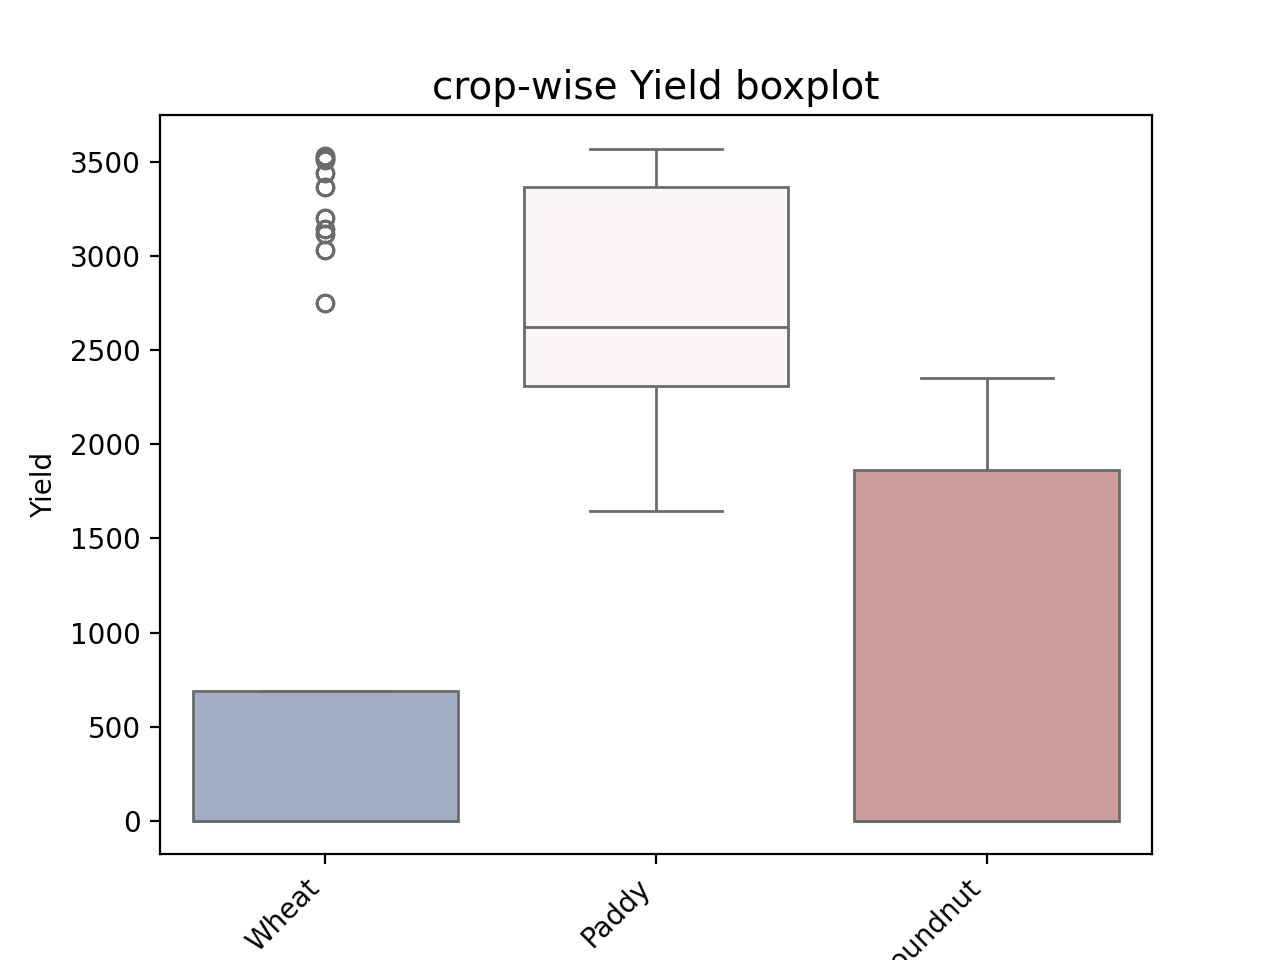

In [7]:
#Box plot, to check the significance of different crops
fig, ax = plt.subplots()
sns.boxplot(x="crop",y="Yield",palette="vlag",data=df,ax=ax) #box plot of crops
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right') #changing the labels of x axis
ax.set_title('crop-wise Yield boxplot',fontsize = 14)#adding title and frontsize of it

It can be observed from the boxplot that Potato is the most produced crop in terms of Yield followed by Cassava, Sweet potatoes and Yams. Significance will be explored in more detail post model-fitting.

Lastly, I looked at the Month-wise crop-Yield. In addition, I also visualized crop- and Month-wise Yield patterns (top 10).

In [8]:
df

,Month,Year,Rainfall,Temperature,Humidity,Yield,cost,crop
0,1,2013,11.3,19.7000,77,0.0,121.6,Wheat
1,2,2013,40.1,22.1500,77,0.0,123.6,Wheat
2,3,2013,15.7,25.5900,63,3117.0,122.8,Wheat
3,4,2013,30.4,28.1700,43,3117.0,120.1,Wheat
4,5,2013,57.8,30.3600,38,3117.0,118.9,Wheat
...,...,...,...,...,...,...,...,...
355,8,2022,264.0,31.5344,77,NaN,175.3,Groundnut
356,9,2022,181.4,31.9751,78,0.0,175.2,Groundnut
357,10,2022,111.8,32.0322,77,0.0,175.2,Groundnut
358,11,2022,18.6,29.1711,72,0.0,176.6,Groundnut


In [9]:
df_c=df.groupby(['Month'])['Yield'].sum().nlargest(10).reset_index(name='Yield')#Month wise total Yield
print(df_c)


   Month    Yield
0      3  87014.0
1      4  87014.0
2      5  87014.0
3      6  36755.0
4      7  36755.0
5      8  36755.0
6      1   6812.0
7      2   6812.0
8     12   4529.0
9      9   3536.0


In [10]:
df

,Month,Year,Rainfall,Temperature,Humidity,Yield,cost,crop
0,1,2013,11.3,19.7000,77,0.0,121.6,Wheat
1,2,2013,40.1,22.1500,77,0.0,123.6,Wheat
2,3,2013,15.7,25.5900,63,3117.0,122.8,Wheat
3,4,2013,30.4,28.1700,43,3117.0,120.1,Wheat
4,5,2013,57.8,30.3600,38,3117.0,118.9,Wheat
...,...,...,...,...,...,...,...,...
355,8,2022,264.0,31.5344,77,NaN,175.3,Groundnut
356,9,2022,181.4,31.9751,78,0.0,175.2,Groundnut
357,10,2022,111.8,32.0322,77,0.0,175.2,Groundnut
358,11,2022,18.6,29.1711,72,0.0,176.6,Groundnut


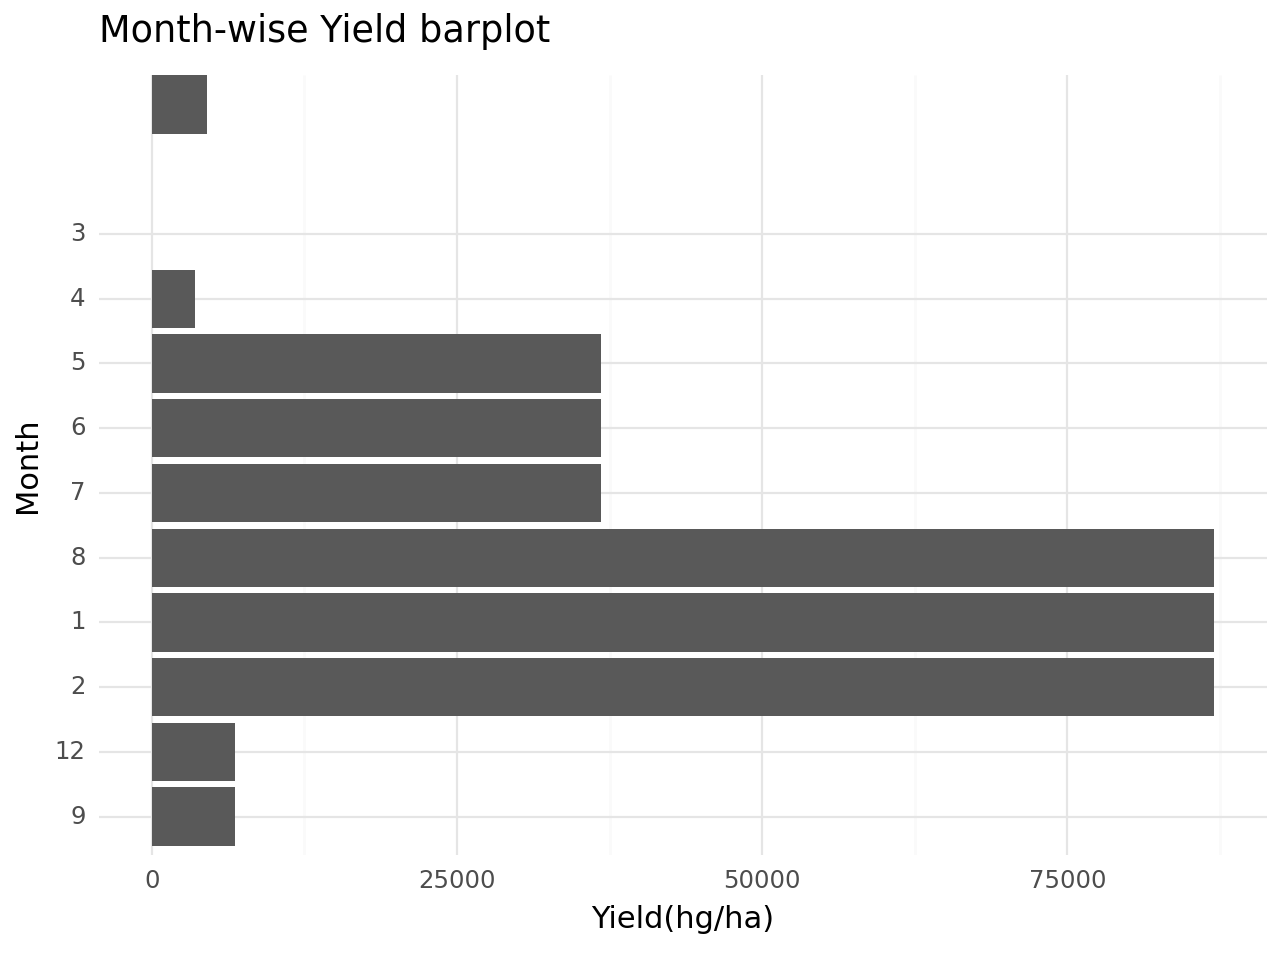

<Figure Size: (640 x 480)>

In [11]:
p=ggplot(df_c,aes(x='Month',y='Yield'))+ geom_bar(stat = "identity")+theme_minimal()+coord_flip()+ scale_x_discrete(limits=df_c['Month'].tolist()[::-1]) #plotting Yield and Month using ggplot
p+labs(title = "Month-wise Yield barplot",x = "Month", y = "Yield(hg/ha)") #adding up title and labels to the x and y axis

In [12]:
df

,Month,Year,Rainfall,Temperature,Humidity,Yield,cost,crop
0,1,2013,11.3,19.7000,77,0.0,121.6,Wheat
1,2,2013,40.1,22.1500,77,0.0,123.6,Wheat
2,3,2013,15.7,25.5900,63,3117.0,122.8,Wheat
3,4,2013,30.4,28.1700,43,3117.0,120.1,Wheat
4,5,2013,57.8,30.3600,38,3117.0,118.9,Wheat
...,...,...,...,...,...,...,...,...
355,8,2022,264.0,31.5344,77,NaN,175.3,Groundnut
356,9,2022,181.4,31.9751,78,0.0,175.2,Groundnut
357,10,2022,111.8,32.0322,77,0.0,175.2,Groundnut
358,11,2022,18.6,29.1711,72,0.0,176.6,Groundnut


In [13]:
print(df.groupby(['crop','Month'])['Yield'].sum().nlargest(10).reset_index(name='Yield')) # 10 highest Yield crop and Month wise

        crop  Month    Yield
0      Paddy      3  34094.0
1      Paddy      4  34094.0
2      Paddy      5  34094.0
3      Wheat      3  32615.0
4      Wheat      4  32615.0
5      Wheat      5  32615.0
6      Paddy      6  22305.0
7      Paddy      7  22305.0
8      Paddy      8  22305.0
9  Groundnut      3  20305.0


In [14]:
df

,Month,Year,Rainfall,Temperature,Humidity,Yield,cost,crop
0,1,2013,11.3,19.7000,77,0.0,121.6,Wheat
1,2,2013,40.1,22.1500,77,0.0,123.6,Wheat
2,3,2013,15.7,25.5900,63,3117.0,122.8,Wheat
3,4,2013,30.4,28.1700,43,3117.0,120.1,Wheat
4,5,2013,57.8,30.3600,38,3117.0,118.9,Wheat
...,...,...,...,...,...,...,...,...
355,8,2022,264.0,31.5344,77,NaN,175.3,Groundnut
356,9,2022,181.4,31.9751,78,0.0,175.2,Groundnut
357,10,2022,111.8,32.0322,77,0.0,175.2,Groundnut
358,11,2022,18.6,29.1711,72,0.0,176.6,Groundnut


**Step 3: Filter Results and Build and Validate Models**


Modeling phase 1: (Data Carpentry: Preparation of data for modeling)
Changing categorical variable: In this dataset there are two features (crop, Month) consist of categorical variables (label values). Modeling cannot work on categorical variables which is why those variables should be converted to numerical category to feed to the model. Here, I have used get_dummies() to achieve this. It created a binary column for each category and returns a matrix with results. Then, data is seperated into training and test datasets. The training dataset is the intial dataset used to train ML algorithm to learn and produce accurate predictions. I have considered 70:30 split of the orginial dataset for generating training and testing datasets. I have built fit models to predict Yield with respect to other features (columns) of the dataset.

In [15]:
df.columns

Index(['Month', 'Year', 'Rainfall', 'Temperature', 'Humidity', 'Yield', 'cost',
       'crop'],
      dtype='object')

In [16]:
df.isnull().sum()

Month           0
Year            0
Rainfall        0
Temperature     0
Humidity        0
Yield          52
cost            0
crop            0
dtype: int64

In [29]:
df['Yield']=df['Yield'].fillna(df['Yield'].mean())

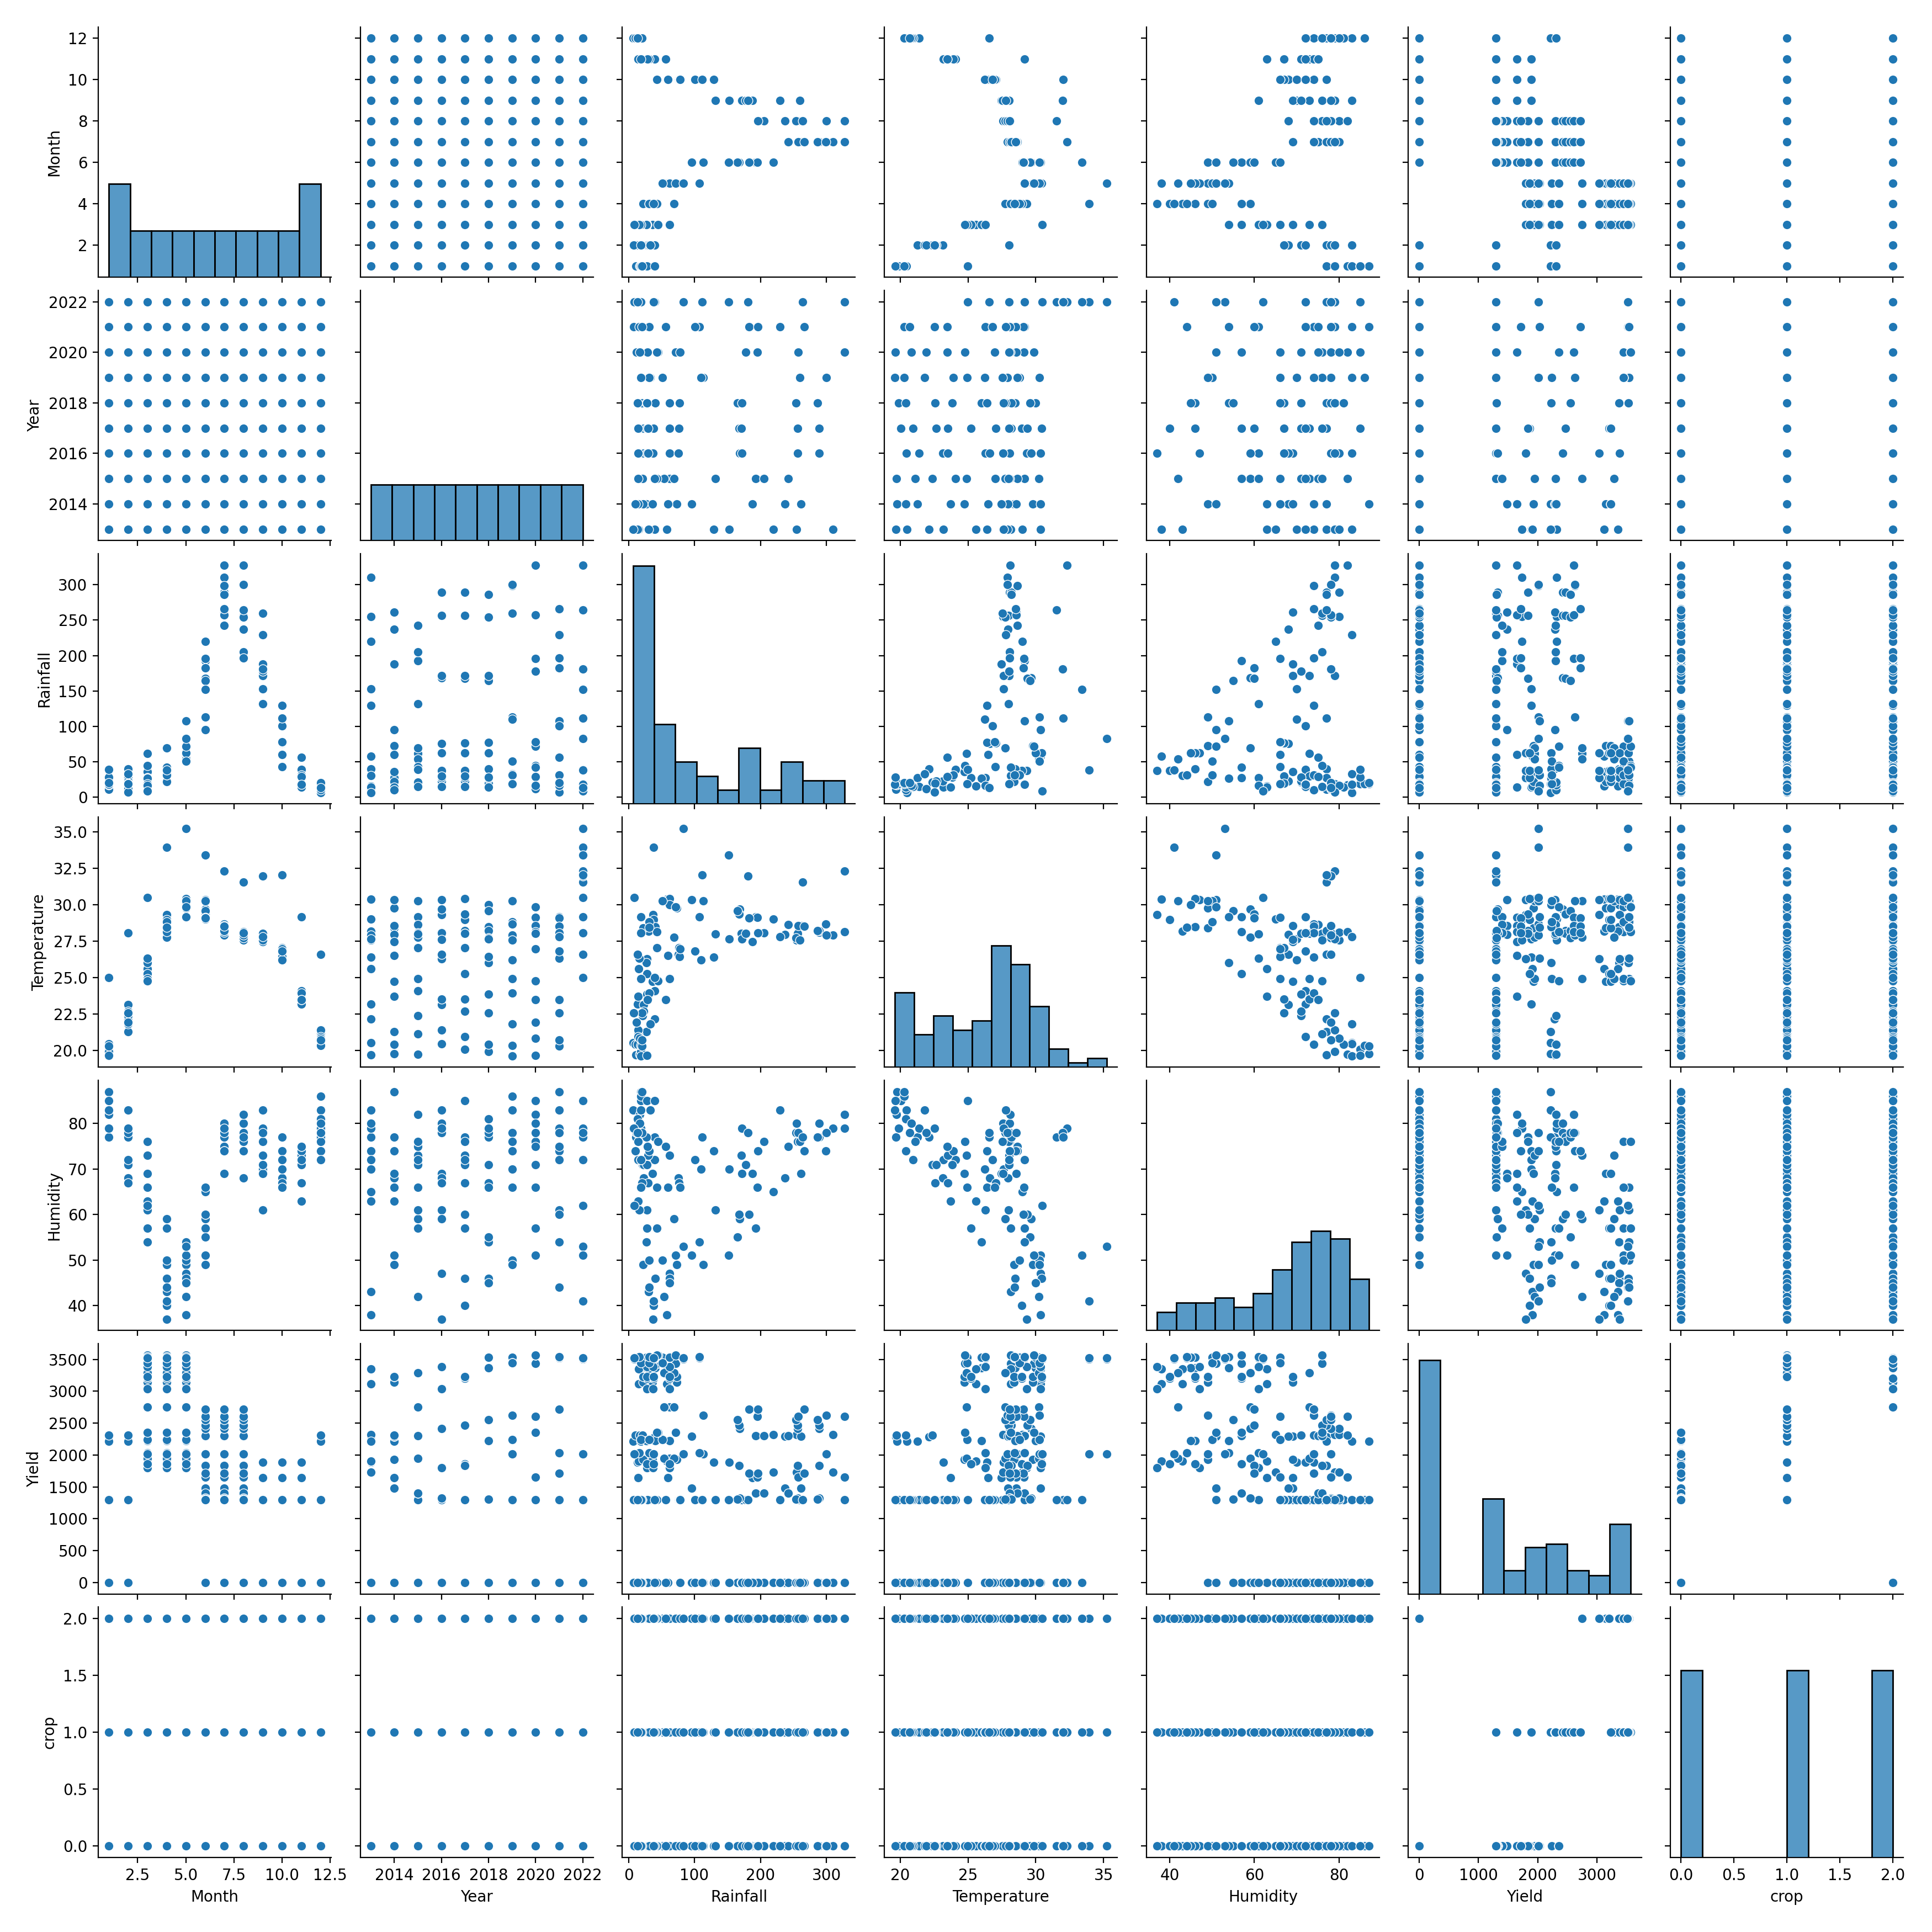

In [30]:
sns.pairplot(df[['Month', 'Year', 'Rainfall', 'Temperature', 'Humidity', 'Yield','crop']])

Modeling phase 2:
Linear Regression model was applied to the dataset.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        360 non-null    int64  
 1   Year         360 non-null    int64  
 2   Rainfall     360 non-null    float64
 3   Temperature  360 non-null    float64
 4   Humidity     360 non-null    int64  
 5   Yield        360 non-null    float64
 6   cost         360 non-null    float64
 7   crop         360 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 22.6 KB


In [33]:
df["crop"].unique()

array([2, 1, 0])

In [34]:
from sklearn.preprocessing import LabelEncoder
df["crop"]=LabelEncoder().fit_transform(df["crop"])
print(df["crop"])
print(df["crop"].unique())

0      2
1      2
2      2
3      2
4      2
      ..
355    0
356    0
357    0
358    0
359    0
Name: crop, Length: 360, dtype: int64
[2 1 0]


In [76]:
X = df[['Month', 'Year', 'Rainfall', 'Temperature', 'Humidity', 'Yield','crop']]
#data creation from the updated columns(excepy Yield) for training
y = df['cost'] #data creation using Yield column for testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=1) #spliting training and testing data

In [77]:
#Modelling Phase:2, application of linear regression model
model = LinearRegression() #calling linear regression function
model.fit(x_train, y_train) #fitting the model
#print(model.coef_)
#print(model.intercept_)
predictions = model.predict(x_test) #prediction using testing data

In [78]:
# printing actual, predicted values with their difference for linear regression model
pred_df1=pd.DataFrame({'Actual Value':y_test,'Predicted Value':predictions,'Difference':y_test-predictions}) #taking actual values, predicted values, difference and creating a dataframe
print(pred_df1) #printing

     Actual Value  Predicted Value  Difference
258         103.5       118.972142  -15.472142
301         114.9       130.944914  -16.044914
93          147.4       159.270391  -11.870391
132         131.1       126.292001    4.807999
175         148.5       145.356608    3.143392
..            ...              ...         ...
27          125.1       135.914737  -10.814737
278         128.9       127.635746    1.264254
300         113.4       132.311833  -18.911833
245         115.8       113.791946    2.008054
224         162.3       166.208119   -3.908119

[72 rows x 3 columns]


In [66]:
from sklearn.ensemble import RandomForestRegressor
model_rf=RandomForestRegressor().fit(x_train,y_train)
y_pred=model_rf.predict(x_test)
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
maerf=mean_absolute_error(y_pred,y_test)

mserf=mean_squared_error(y_pred,y_test)
r2rf=r2_score(y_pred,y_test)

In [73]:
pred_df2=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred}) #taking actual values, predicted values, difference and creating a dataframe
print(pred_df1) #printing

     Actual Value  Predicted Value  Difference
258         103.5       118.972142  -15.472142
301         114.9       130.944914  -16.044914
93          147.4       159.270391  -11.870391
132         131.1       126.292001    4.807999
175         148.5       145.356608    3.143392
..            ...              ...         ...
27          125.1       135.914737  -10.814737
278         128.9       127.635746    1.264254
300         113.4       132.311833  -18.911833
245         115.8       113.791946    2.008054
224         162.3       166.208119   -3.908119

[72 rows x 3 columns]


In [74]:
from sklearn.svm import SVR
model_svm=SVR().fit(x_train,y_train)
y_pred=model_svm.predict(x_test)
from sklearn.metrics import mean_squared_error,mean_squared_error
maesvm=mean_absolute_error(y_pred,y_test)
maesvm
msesvm=mean_squared_error(y_pred,y_test)
r2svm=r2_score(y_pred,y_test)

In [75]:
pred_df3=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred}) #taking actual values, predicted values, difference and creating a dataframe
print(pred_df1) #printing

     Actual Value  Predicted Value  Difference
258         103.5       118.972142  -15.472142
301         114.9       130.944914  -16.044914
93          147.4       159.270391  -11.870391
132         131.1       126.292001    4.807999
175         148.5       145.356608    3.143392
..            ...              ...         ...
27          125.1       135.914737  -10.814737
278         128.9       127.635746    1.264254
300         113.4       132.311833  -18.911833
245         115.8       113.791946    2.008054
224         162.3       166.208119   -3.908119

[72 rows x 3 columns]


In [79]:
from sklearn.ensemble import GradientBoostingRegressor
model_gbc=GradientBoostingRegressor().fit(x_train,y_train)
y_pred=model_gbc.predict(x_test)
from sklearn.metrics import mean_squared_error
msegbc=mean_absolute_error(y_pred,y_test)
msegbc
msesvm=mean_squared_error(y_pred,y_test)
r2gbc=r2_score(y_pred,y_test)

Modeling phase 3: Decision Tree model was applied to the dataset.

In [80]:
#Model phase 3: Application of Decision Tree model
clf = tree.DecisionTreeRegressor() #calling decision tree
clf = clf.fit(x_train, y_train) #fitting the model
y_pred = clf.predict(x_test) #prediction using testing data
features=clf.feature_importances_ #selecting important features#sorting the features and embeding with the column names


In [81]:
# printing actual, predicted values with their difference for linear regression model
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred}) #taking actual values, predicted values, difference and creating a dataframe
print(pred_df) #printing

     Actual Value  Predicted Value  Difference
258         103.5            106.3        -2.8
301         114.9            112.4         2.5
93          147.4            159.4       -12.0
132         131.1            133.5        -2.4
175         148.5            149.1        -0.6
..            ...              ...         ...
27          125.1            122.3         2.8
278         128.9            123.3         5.6
300         113.4            112.4         1.0
245         115.8            110.3         5.5
224         162.3            165.0        -2.7

[72 rows x 3 columns]


**Step 4: Visualize Results**

Accuracy comparison between the two models: In this segment I have tried to calculate different error measures between the two models plotted those for better understanding.
The mean squared error of an estimator measures the average of the squares of the errors, which means the difference between the observed and predicted Yield values.
The mean absolute error (MAE) is a quantity used to measure how close my predictions are to the final observed outcomes. The mean absolute error is an average of the all absolute errors.
Basically, the difference between observed and predicted values which is called residuals, and is used in the calculation of Root Mean Square Error and Mean Absolute Error.

(array([0, 1]),
 [Text(0, 0, 'mean absolute error'), Text(1, 0, 'root mean square error')])

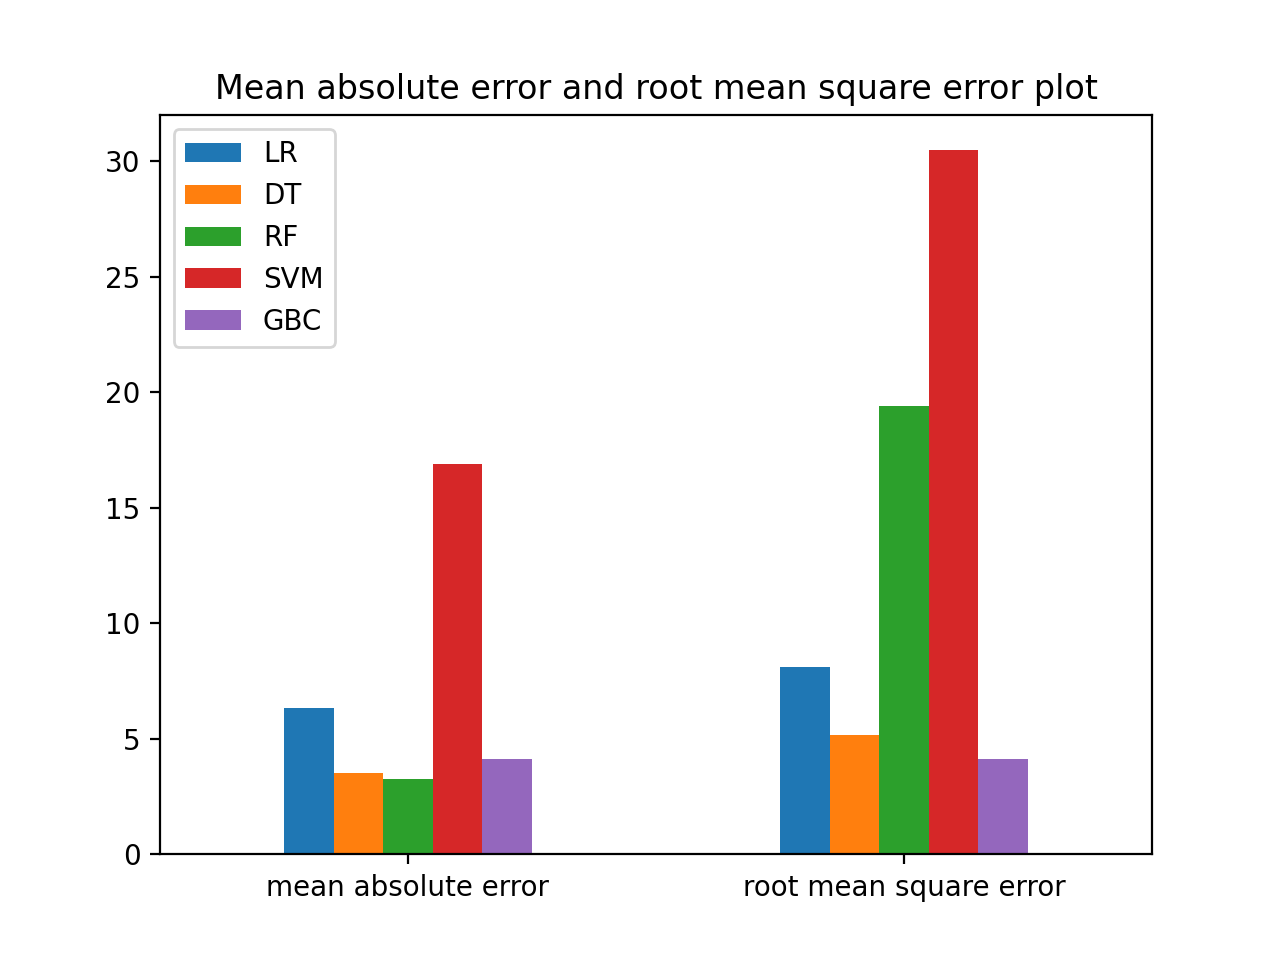

In [82]:
from math import sqrt
from sklearn import metrics

#print(r2lr)
#print(r2dt)

#error measures for linear regression
maelr=metrics.mean_absolute_error(y_test, predictions) #meam absolute error for linear regression
mselr=metrics.mean_squared_error(y_test, predictions) #mean squared error for linear regression
rmslr=metrics.root_mean_squared_error = sqrt(mselr) #root mean squared for linear regression


#error measures for decision tree
maedt=metrics.mean_absolute_error(y_test, y_pred) #meam absolute error for decision tree
msedt=metrics.mean_squared_error(y_test, y_pred) #meam squared error for decision tree
rmdt=metrics.root_mean_squared_error = sqrt(msedt) # root meam square error for decision tree

#mean squre plot
ploterror1=pd.DataFrame({"LR":[maelr,rmslr],"DT":[maedt,rmdt],"RF":[maerf,mserf],"SVM":[maesvm,msesvm],"GBC":[maegbc,msegbc]},index=["mean absolute error","root mean square error"]) #creating dataframe to compute result
ploterror1.plot(kind="bar") #plotting using pandas plot
plt.title("Mean absolute error and root mean square error plot") #including plot title
plt.xticks(rotation = 360)# changing the label's direction

From the above visualization, it can be noted that the error rate for linear regression model is higher than for decision tree model. Therefore, I will calculate R squared value also so that I can decide which model works better for my chosen dataset.

R squared plot shows about how well the value data points fit a curve or line in a model. It is a statistical measure between 0 and 1 which calculates how similar a regression line is to the data, it has been fitted to. If it is 1, the model should completely and accurately (100%) predict the data variance. On the other hand, if it is 0, the model would completely fail to predict the variance.

(array([0]), [Text(0, 0, 'R squared')])

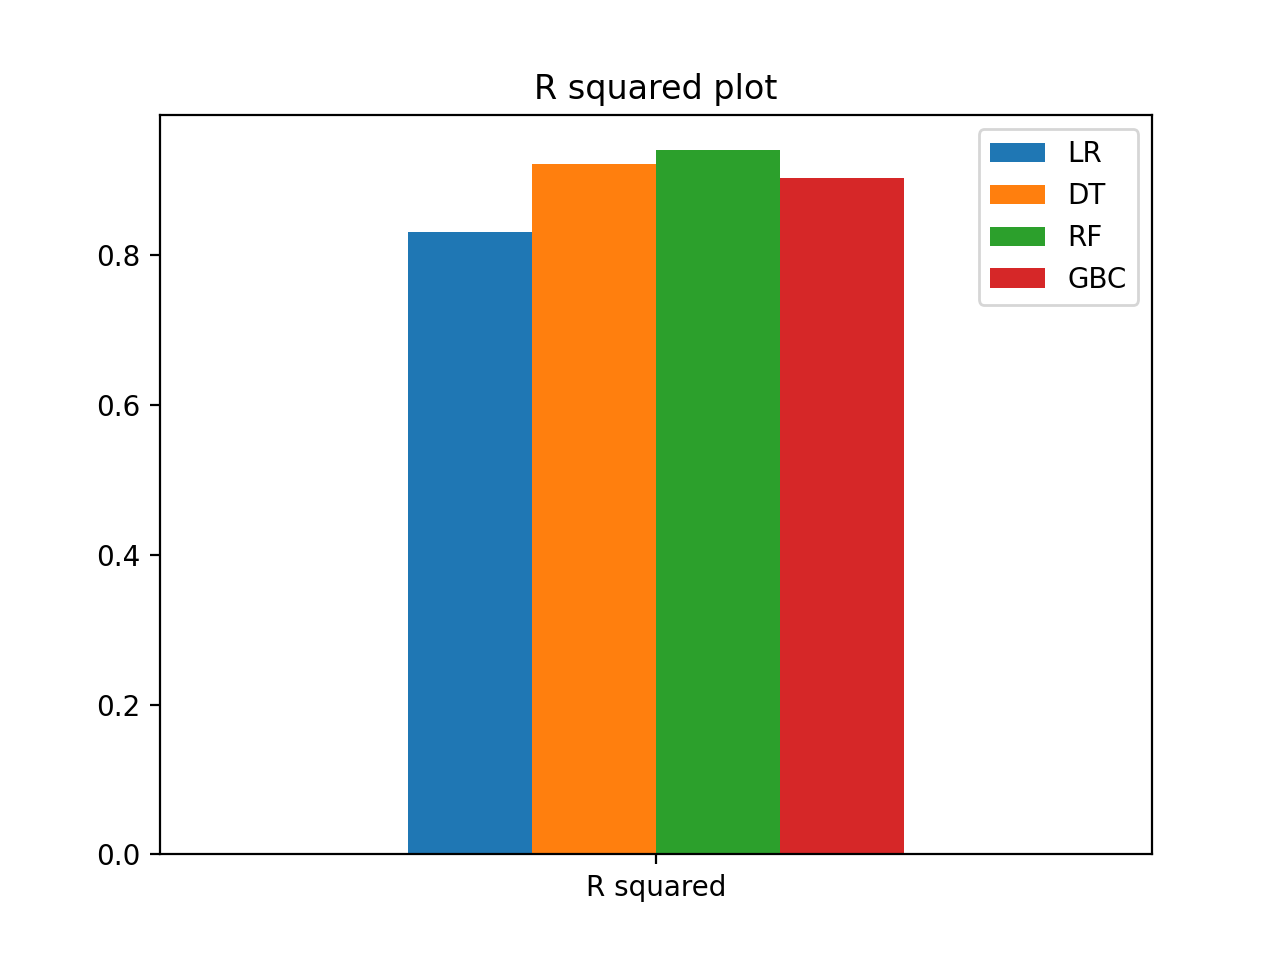

In [71]:
r2lr =metrics.r2_score(y_test,predictions) #R squared for linear regression
r2dt =metrics.r2_score(y_test,y_pred) #R squared for decision tree


#r square plot
ploterror2=pd.DataFrame({"LR":[r2lr],"DT":[r2dt],"RF":[r2rf],"GBC":[r2gbc]},index=["R squared"]) #creating dataframe to compute result
ploterror2.plot(kind="bar") #plotting using pandas plot
plt.title("R squared plot") #including plot title
plt.xticks(rotation = 360)#changing the label's directions

From the above barplot visualization of R squared value for the two fit models, we can conclude that decision tree classifier has predicted values in the test dataset more accurately as compared to the linear regression classifier.

Now, it's time to visualize the two models as per the two ML algorthims, LR and DT. Here, observed values vs predicted values are plotted in a scatter plot for both the models.

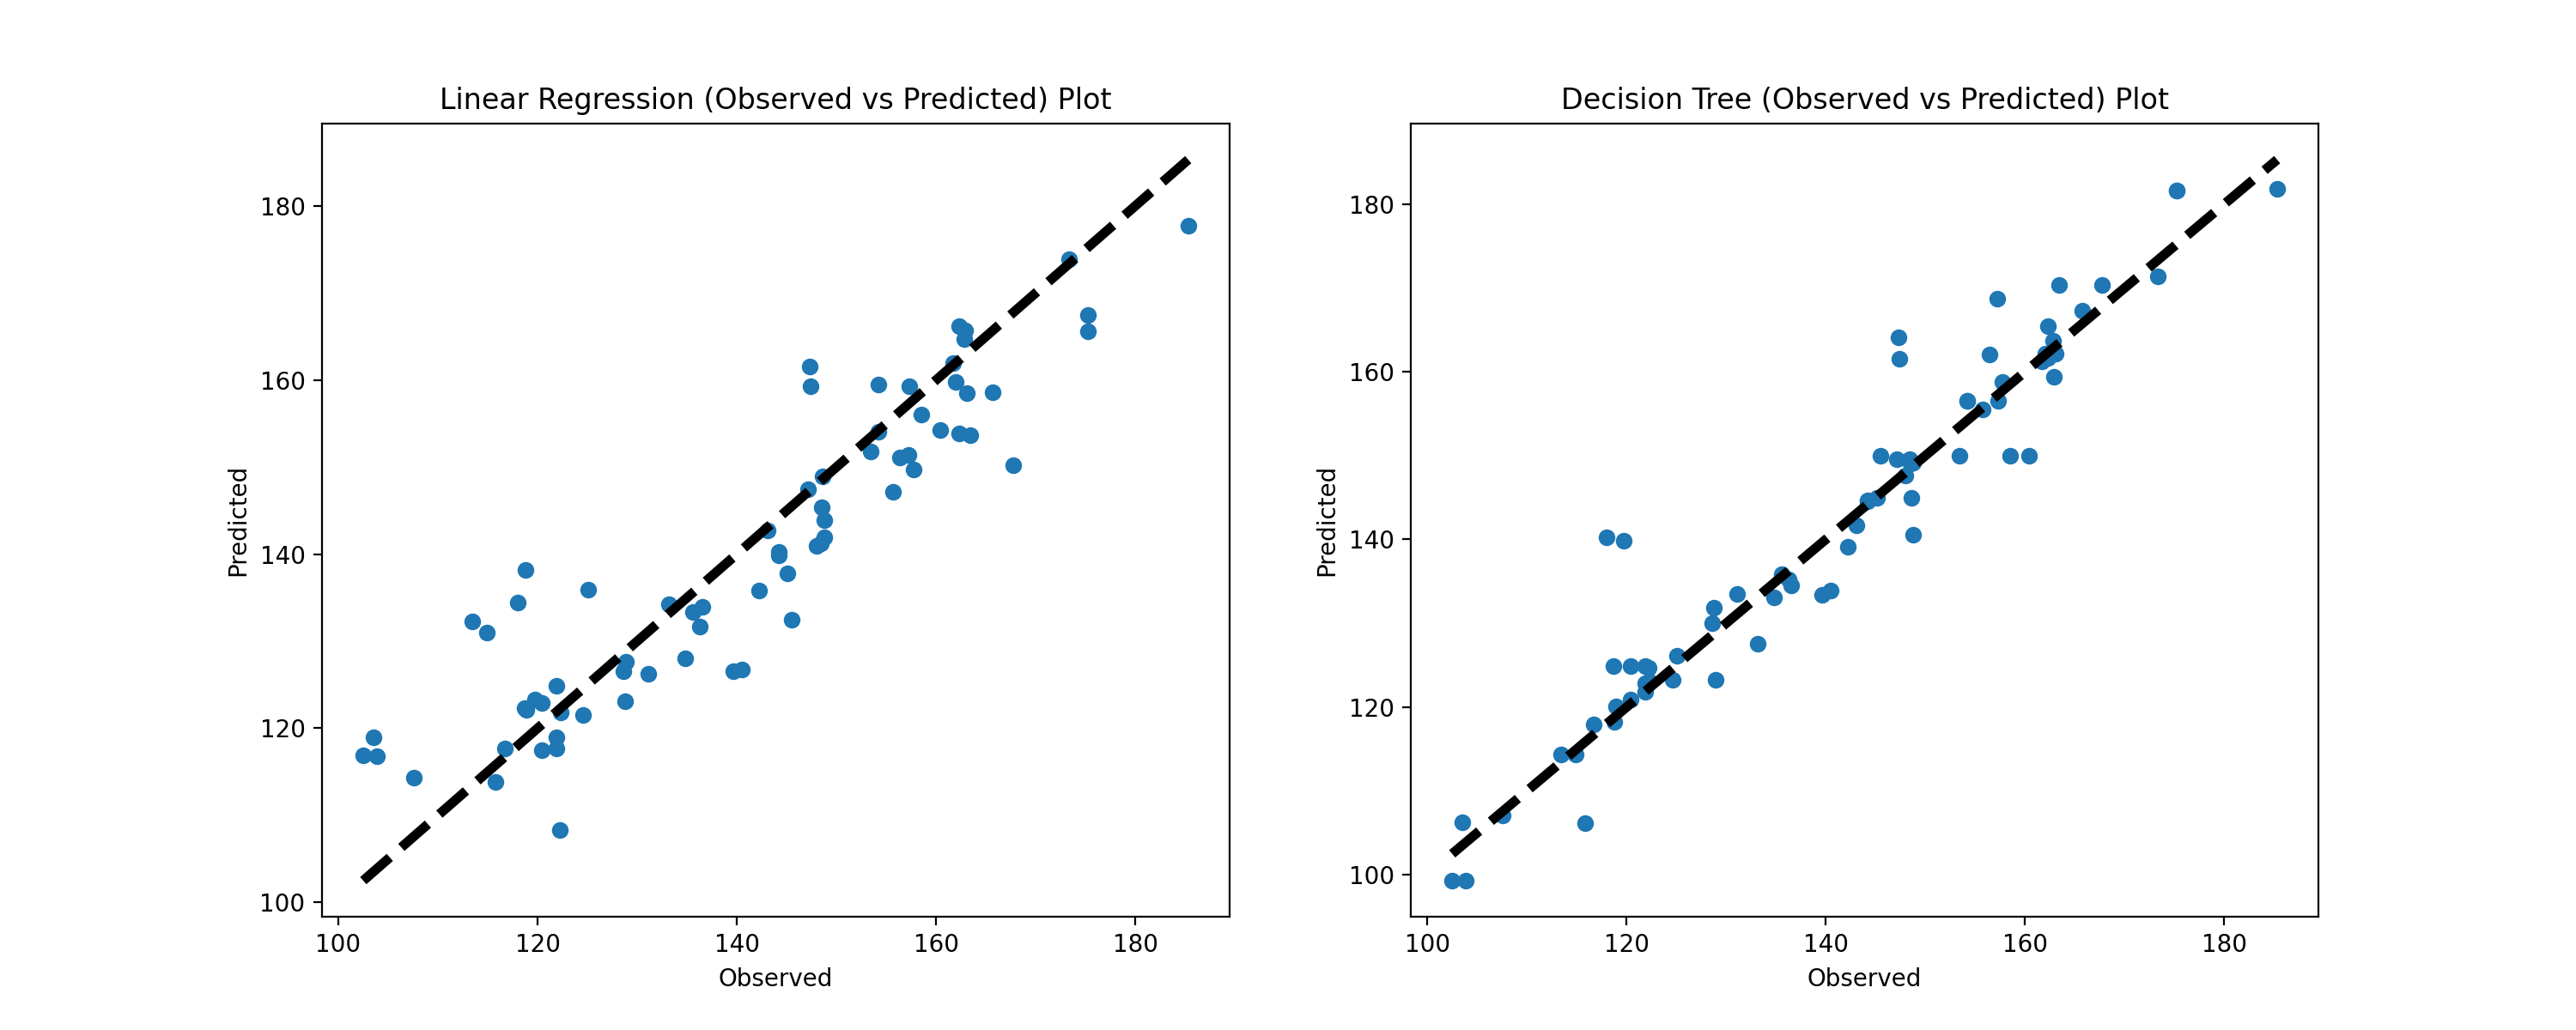

In [42]:
# Actual vs predicted plot, In this part I have plotted actual points and predicted points to visualize the accuracy of both the models
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6)) #creating axes for grid plot
#for linear regression
ax1.scatter(y_test, predictions) #plotting a scatter plot
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4) # creating regressor line
ax1.set_xlabel('Observed') #setting label for x axis
ax1.set_ylabel('Predicted') #setting label for y axis
ax1.set_title('Linear Regression (Observed vs Predicted) Plot') #setting title

#for decision tree
ax2.scatter(y_test, y_pred) #plotting a scatter plot
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4) # creating line
ax2.set_xlabel('Observed')  #setting label for x axis
ax2.set_ylabel('Predicted')  #setting label for y axis
ax2.set_title('Decision Tree (Observed vs Predicted) Plot') #setting title
plt.show()

We can clearly see that in decision tree all the data-points are close to the regression diagonal line (black). If the model has a high R squared value, all the points will be close to the diagonal. The lower the R Squared, the weaker the "Goodness of fit" to the model, the more scattered/dispersed points are from the regression diagonal line (black). So, if the two plots are compared, in decision tree plot points are more close to regressor line as compared to in the linear regression plot.

Lastly, in this feature selection plot, I have plotted 15 important features (column names), which could have a direct effect on the model.

       feature  importance
0         Year    0.775484
1         crop    0.138408
2        Month    0.037979
3  Temperature    0.026758
4     Rainfall    0.009211
5     Humidity    0.006149
6        Yield    0.006010


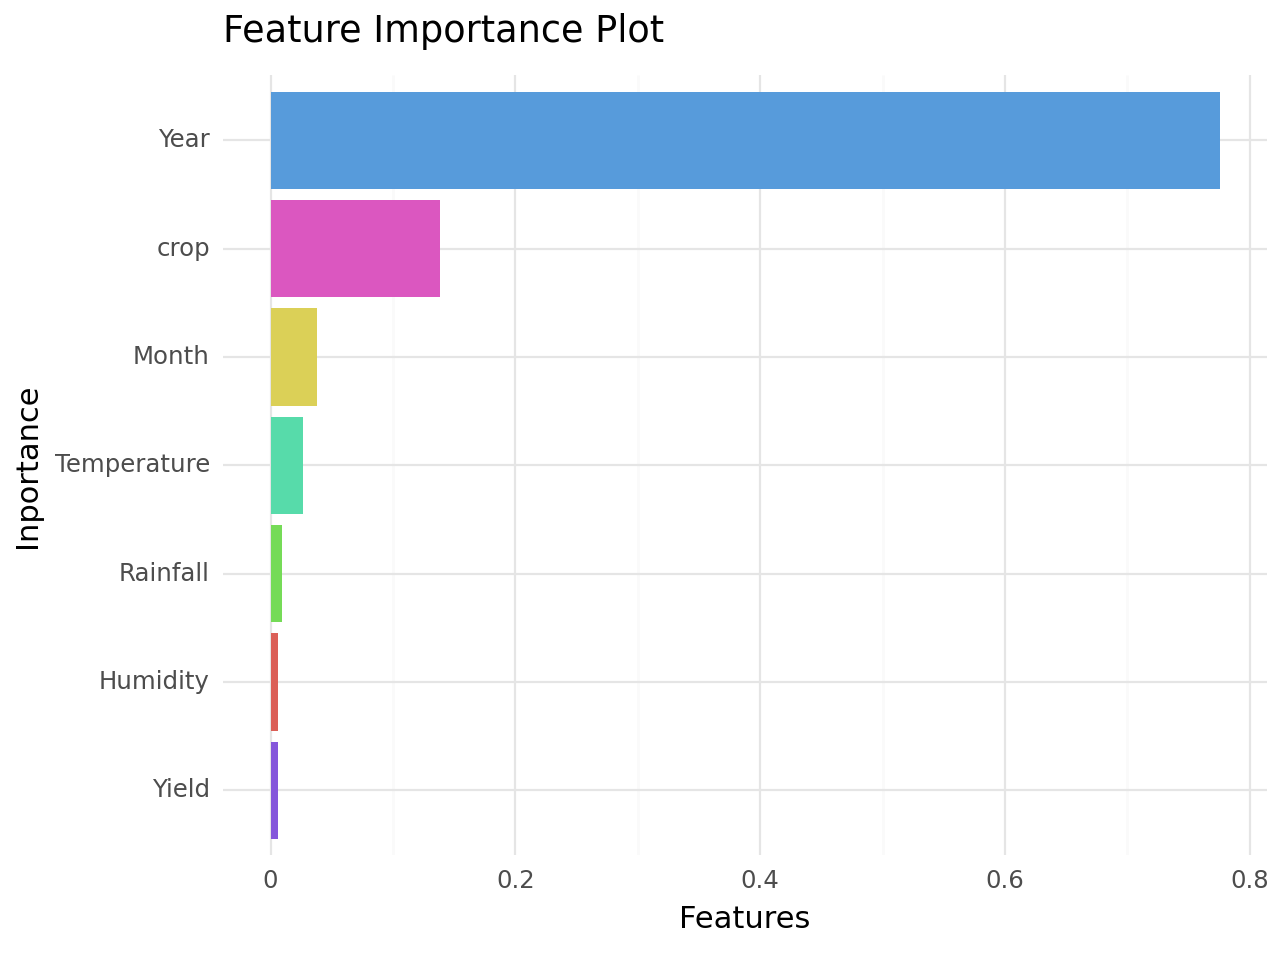

<Figure Size: (640 x 480)>

In [43]:
top_features = sorted(zip(X,features), key=lambda x: x[1], reverse=True) #zipping column names with features
f_df=pd.DataFrame(top_features[:15]) #making dataframe with the top 15 values
f_df.columns = ['feature', 'importance'] #renaming columns
print(f_df) #printing
p1=ggplot(f_df, aes('feature','importance', fill='feature'))+ geom_bar(stat="identity")+theme_minimal()+ coord_flip()+scale_x_discrete(limits=f_df['feature'].tolist()[::-1])
p1+guides(fill = False, color = False, linetype = False, shape = False)+ labs(title = "Feature Importance Plot",x = "Inportance", y = "Features")
#plotting of those top 15 featues

Rainfalls are having the highest importance in the decision making of Yield-prediction. The second important feature is average temperature followed by crop types maize, potato, sweet potato. This makes sense, since those are highly produced crops that we observed earlier. Overall, the assumption about these features seem correct with all of them are having impact on the expected crops Yield in the model.

In this dataset, crop Yield for different countries is provided along with other features such as average rainfall, avergae temperature, Rainfall usage data in a Month-wise and year-wise manner. However, a strong correlation could not be observed between any of the features. A correlation value of 0.31 could be observed between the average rainfall and the average temperature.
Potatoes were mostly grown among all crops and its production also increased over the years in terms of Yield. Yield of other crops also increased over the years as seen from boxplot statistical visualization. Features such as average rainfall, avergae temperature and Rainfall usage could be repsonsible for this. The plot data for avergae temperature and rainfall could not be appropriatley plotted since these values does not vary by year for most countries. However, a strong increase in Rainfall usage over time could be seen.
To assess if indeed Rainfall usage increase could have led to the increase in crop Yield, two fit mpdels in machine learning algorithms were employed and clearly both decision tree and linear regression models were appropriate models for this dataset in crop Yield prediction. However, decision tree came out as a winner in being a superior model for crop Yield prediction.
As assumed above, indeed, Rainfall usage was the more important feature in predicting crop Yield followed by avergae temperature.

This could be an effect of the green revolution efforts where more use of chemicals such as fertilizers, Rainfalls and herbicides were encouraged. Thus our analyses also makes sense with the agricutural improvements and the reasons behind the dramatic increase in crop Yields globally. Such kind of analsyes are crucial to predict agricultural food production in the future where global climate changes can be observed and global warming is approaching us faster than we thought. This would help us modify our agricultural practices and inputs as per the desired Yield output to feed the ever-growing population.